Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Data Collections and analysis

PIMA Diabetes Dataset

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [6]:
round(df.groupby('Outcome').mean(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [7]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

In [8]:
Df = df.copy(deep=True)

Splitting dataset into features and Target

In [9]:
Train_val = df.sample(frac = 0.9, random_state=42)
Test = df.drop(Train_val.index)

In [10]:
X = Train_val.drop(columns = 'Outcome', axis=1)
y = Train_val['Outcome']

X_test = Test.drop(columns = 'Outcome')
y_test = Test['Outcome']

In [11]:
y.value_counts()

,count
Outcome,
0,450
1,241


In [12]:
from imblearn.over_sampling import SMOTE

smote =  SMOTE()
X, y = smote.fit_resample(X,y)

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)

Splitting Dataset into Training and Test Data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

Training the Data

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel = 'linear')

In [17]:
model.fit(X_train, y_train)

SVC(kernel='linear')

Model prediction

In [18]:
y_pred = model.predict(X_val)
y_pred_test = model.predict(X_test)

Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
Training_score = model.score(X_train, y_train)
Validation_score = model.score(X_val, y_val)
Test_score = accuracy_score(y_test, y_pred_test)

In [21]:
print(f'Training Score: {Training_score:.2f}')
print(f'Validation Score: {Validation_score:.2f}')
print(f'Test score: {Test_score:.2f}')

Training Score: 0.74
Validation Score: 0.76
Test score: 0.77


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        50
           1       0.64      0.78      0.70        27

    accuracy                           0.77        77
   macro avg       0.75      0.77      0.75        77
weighted avg       0.78      0.77      0.77        77



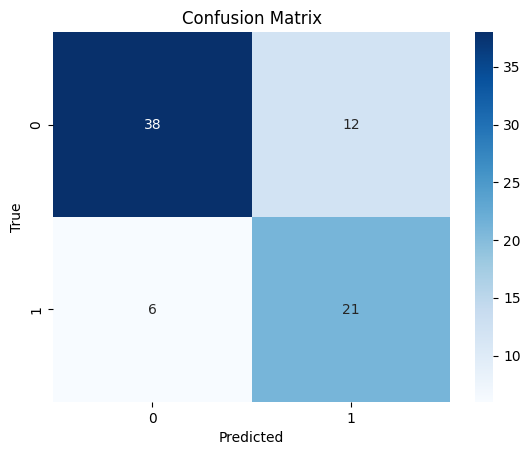

In [23]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Saving the trained model

In [24]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

Loading the trained model

In [25]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

Making a predictive system


In [27]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# Change input_data to numpy array
input_data_as_array = np.asarray(input_data)

# Reshape the input_data array
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]):
  print('The person is diabetic')
else:
  print('The person is not diabetic')

[1]
The person is diabetic
